In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
data=pd.read_csv(r'C:\Users\ELCOT\Downloads\Data Science Salary data.csv')
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,US,L
5,2023,EN,FT,Applied Scientist,110680,USD,US,L
6,2023,EN,FT,Machine Learning Engineer,163196,USD,US,M
7,2023,EN,FT,Machine Learning Engineer,145885,USD,US,M
8,2023,EN,FT,Research Scientist,220000,USD,US,L
9,2023,EN,FT,Data Engineer,85000,USD,US,M


In [3]:
#data preparation and Cleaning


In [4]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   company_location  3761 non-null   object
 7   company_size      3761 non-null   object
dtypes: int64(2), object(6)
memory usage: 235.2+ KB


In [5]:
data.shape
#The data has 3761 Rows and 8 columns

(3761, 8)

In [6]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'company_location', 'company_size'],
      dtype='object')

In [7]:
#find null values
data.isnull().sum()
#there is no null values

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
company_location    0
company_size        0
dtype: int64

In [8]:
#find duplicates
data.duplicated().sum()

1352

In [9]:
#remove Duplicates
data.drop_duplicates(subset=None,keep='first',inplace=True)

In [10]:
data.shape

(2409, 8)

In [11]:
#Replace values in data set
data['experience_level'].unique()

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

In [12]:
data['experience_level']=data['experience_level'].replace('EN',"Entry Level")
data['experience_level']=data['experience_level'].replace('EX',"Experienced")
data['experience_level']=data['experience_level'].replace('SE',"Senior")
data['experience_level']=data['experience_level'].replace('MI',"Mid Level")


In [13]:
data['employment_type'].unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [14]:
data['employment_type']=data['employment_type'].str.replace('FT','Full Time')
data['employment_type']=data['employment_type'].str.replace('PT','Part Time')
data['employment_type']=data['employment_type'].str.replace('CT','Contractor')
data['employment_type']=data['employment_type'].str.replace('FL','Freelancer')


In [15]:
data['company_size'].unique()

array(['L', 'M', 'S'], dtype=object)

In [16]:
data['company_size']=data['company_size'].replace('L','Large')
data['company_size']=data['company_size'].replace('M','Medium')
data['company_size']=data['company_size'].replace('S','Small')


In [17]:
data['merge']=data['salary_currency'].astype(str)+" "+data['salary'].astype(str)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,merge
0,2023,Entry Level,Full Time,Applied Scientist,213660,USD,US,Large,USD 213660
1,2023,Entry Level,Full Time,Applied Scientist,130760,USD,US,Large,USD 130760
2,2023,Entry Level,Full Time,Data Quality Analyst,100000,USD,NG,Large,USD 100000
3,2023,Entry Level,Full Time,Compliance Data Analyst,30000,USD,NG,Large,USD 30000
4,2023,Entry Level,Full Time,Applied Scientist,204620,USD,US,Large,USD 204620


In [18]:
#converted salary in USD for uniform
data['salary_currency'].unique()


array(['USD', 'INR', 'CAD', 'EUR', 'CHF', 'PLN', 'BRL', 'GBP', 'HKD',
       'SGD', 'THB', 'AUD', 'ILS', 'HUF', 'CZK', 'DKK', 'JPY', 'TRY',
       'CLP', 'MXN'], dtype=object)

In [19]:
#convert salary in USD
           
    def convert(sal):
        currency=sal.split(' ')[0]
        salary=float(sal.split(' ')[1])

    
        
        if currency=='MXN':
            salary=salary*0.059

        elif currency=='INR':
            salary=salary*0.012
        elif currency=='CAD':
            salary=salary*0.75
        elif currency=='EUR':
            salary=salary*1.09
        elif currency=='CHF':
            salary=salary*1.17
        elif currency=='PLN':
            salary=salary*0.25
        elif currency=='BRL':
            salary=salary**0.20
        elif currency=='GBP':
            salary=salary*1.27
        elif currency=='HKD':
            salary=salary*0.13
        elif currency=='SGD':
            salary=salary*0.75
        elif currency=='THB':
            salary=salary*0.029
        elif currency=='AUD':
            salary=salary*0.67
        elif currency=='ILS':
            salary=salary*0.27
        elif currency=='HUF':
            salary=salary*0.0029
        elif currency=='CZK':
            salary=salary*0.044
        elif currency=='DKK':
            salary=salary*0.15
        elif currency=='JPY':
            salary=salary*0.0069
        elif currency=='TRY':
            salary=salary*0.034
        elif currency=='CLP':
            salary=salary*0.0011
        else:
            salary=salary
        return salary
    
data['salary_usd']=data['merge'].apply(convert)      
        

In [20]:
data.head(15)
               

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,merge,salary_usd
0,2023,Entry Level,Full Time,Applied Scientist,213660,USD,US,Large,USD 213660,213660.0
1,2023,Entry Level,Full Time,Applied Scientist,130760,USD,US,Large,USD 130760,130760.0
2,2023,Entry Level,Full Time,Data Quality Analyst,100000,USD,NG,Large,USD 100000,100000.0
3,2023,Entry Level,Full Time,Compliance Data Analyst,30000,USD,NG,Large,USD 30000,30000.0
4,2023,Entry Level,Full Time,Applied Scientist,204620,USD,US,Large,USD 204620,204620.0
5,2023,Entry Level,Full Time,Applied Scientist,110680,USD,US,Large,USD 110680,110680.0
6,2023,Entry Level,Full Time,Machine Learning Engineer,163196,USD,US,Medium,USD 163196,163196.0
7,2023,Entry Level,Full Time,Machine Learning Engineer,145885,USD,US,Medium,USD 145885,145885.0
8,2023,Entry Level,Full Time,Research Scientist,220000,USD,US,Large,USD 220000,220000.0
9,2023,Entry Level,Full Time,Data Engineer,85000,USD,US,Medium,USD 85000,85000.0


In [21]:
data.drop(['salary','merge'],axis=1,inplace=True)


In [22]:
data.dtypes

work_year             int64
experience_level     object
employment_type      object
job_title            object
salary_currency      object
company_location     object
company_size         object
salary_usd          float64
dtype: object

In [23]:
#statistics
data.describe()

,work_year,salary_usd
count,2409.000000,2409.000000
mean,2022.288086,132814.027616
std,0.761967,68489.825309
min,2020.000000,7.981950
25%,2022.000000,82500.000000
50%,2022.000000,129000.000000
75%,2023.000000,175100.000000
max,2023.000000,450000.000000


In [24]:
data['job_title'].value_counts()[:11]

Data Engineer                529
Data Scientist               492
Data Analyst                 355
Machine Learning Engineer    198
Analytics Engineer            85
Data Architect                64
Research Scientist            63
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Applied Scientist             30
Name: job_title, dtype: int64

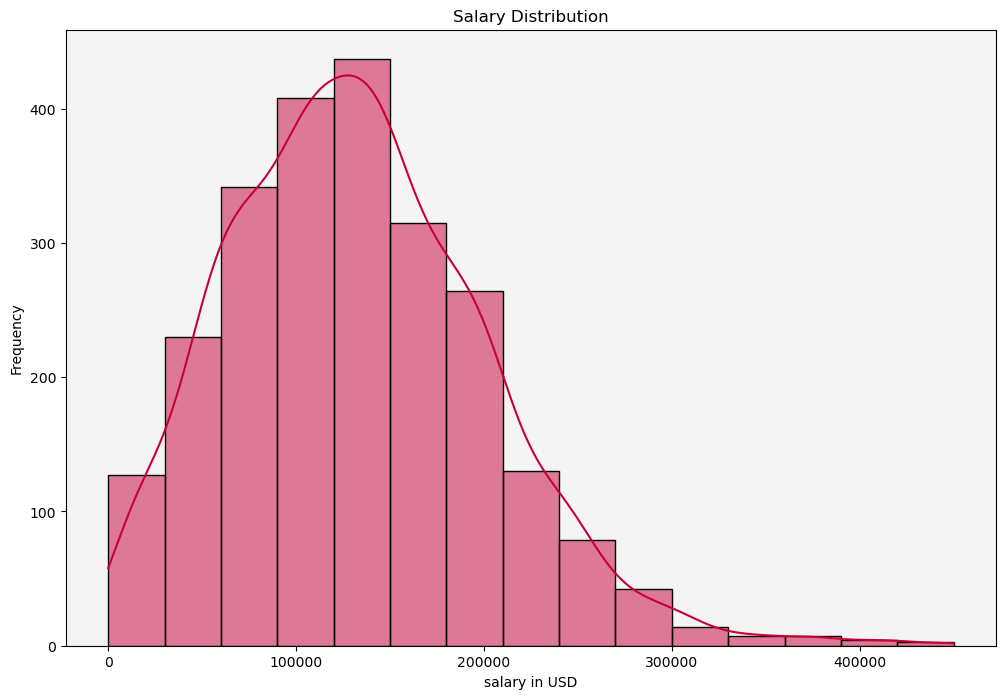

In [109]:
#salary Distribution
plt.figure(figsize=(12,8))
p=sns.histplot(data['salary_usd'],kde=True,color='#C70039',bins=15)
plt.title('Salary Distribution')
plt.xlabel('salary in USD')
plt.ylabel('Frequency')
p.set_facecolor('#f4f4f4')
plt.show()

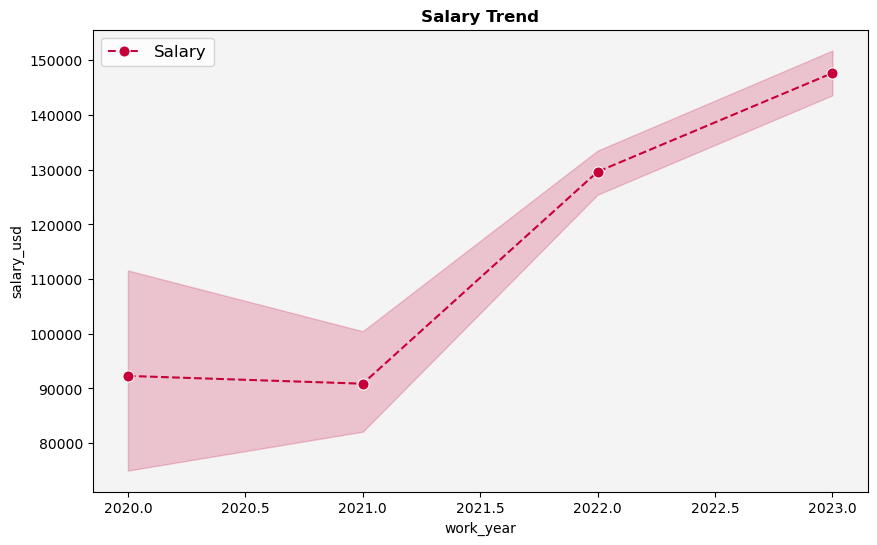

In [25]:
#salary trend
plt.figure(figsize = (10,6))
salary_trend = data[['salary_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_usd', marker = 'o',linestyle='--', color='#C70039', markersize=8 )
plt.title('Salary Trend', fontsize=12, fontweight='bold')

plt.legend(['Salary'], loc='upper left', fontsize=12)
p.set_facecolor('#f4f4f4')

plt.show()

In [26]:
#There wasn't much change in salary from 2020 to 2021.
#Continual changes occurred in salary from 2021 to 2022.
#The progress in salary from 2022 to 2023 followed a similar pattern.

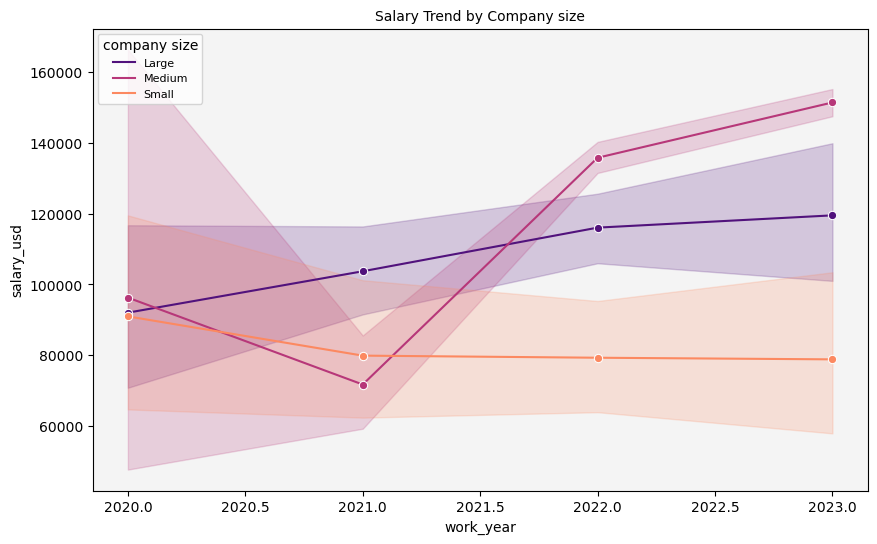

In [106]:
plt.figure(figsize=(10,6))
p = sns.lineplot(data=data, x='work_year', y='salary_usd', hue='company_size', marker='o',palette='magma')
plt.title('Salary Trend by Company size',fontsize=10)
plt.legend(title='company size',fontsize=8,loc='best')
p.set_facecolor('#f4f4f4')
plt.show()

In [28]:
#In 2023 medium size company salary trend is increased compared to large and small size companies

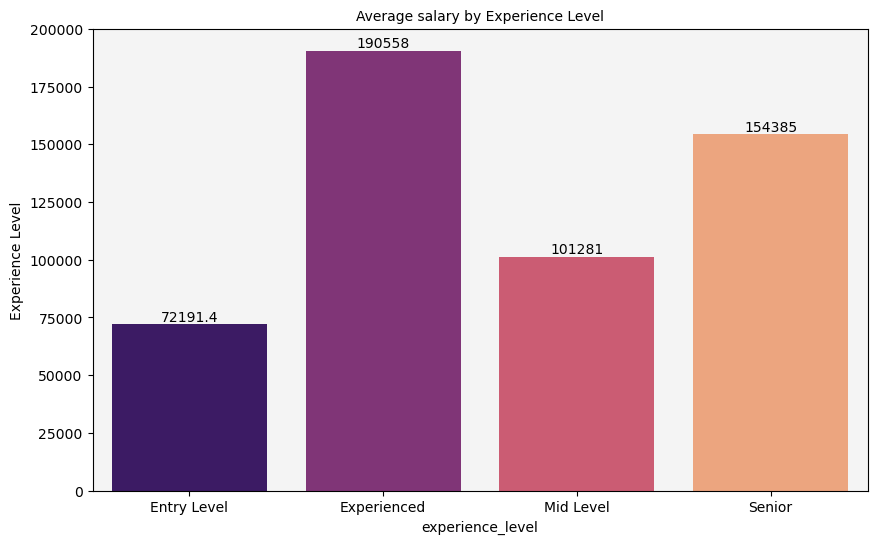

In [105]:
#average Salary By experience level
exp_salary=data.groupby('experience_level')['salary_usd'].mean()
plt.figure(figsize=(10,6))
exp=sns.barplot(x=exp_salary.index,y=exp_salary.values,palette='magma')
plt.title('Average salary by Experience Level',fontsize=10)
plt.ylabel('Average Salary_usd',fontsize=10)
plt.xlabel('Experience Level',fontsize=10)
exp.set_facecolor('#f4f4f4')
for container in exp.containers:
    exp.bar_label(container,label_type='edge')
plt.show()

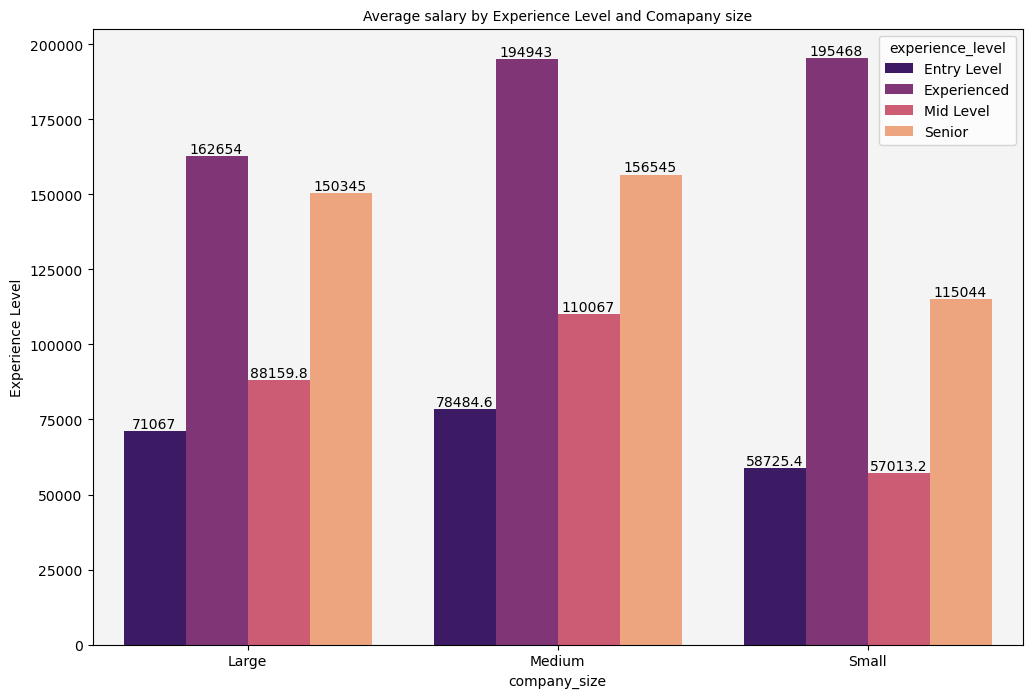

In [104]:
#calculate average salary for each combination of experience level and company size
exp_salary=data.groupby(['experience_level','company_size'])['salary_usd'].mean().reset_index()
plt.figure(figsize=(12,8))
exp=sns.barplot(data=exp_salary,x='company_size',y='salary_usd',hue='experience_level',palette='magma')
plt.title('Average salary by Experience Level and Comapany size',fontsize=10)
plt.ylabel('Average Salary_usd',fontsize=10)
plt.ylabel('Experience Level',fontsize=10)
exp.set_facecolor('#f4f4f4')
for container in exp.containers:
    exp.bar_label(container,label_type='edge')
plt.show()

In [34]:
#Experienced type got the high average salary in each company 

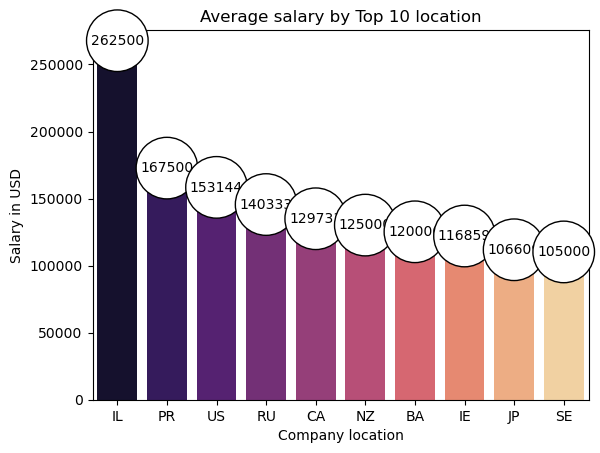

<Figure size 1200x800 with 0 Axes>

In [103]:
#Average Salary by Location
loc_salary=data.groupby('company_location')['salary_usd'].mean().reset_index()
loc_salary=loc_salary.sort_values(by='salary_usd',ascending=False)
top =10
p=sns.barplot(data=loc_salary.head(top),x='company_location',y='salary_usd',palette='magma')
plt.title(f'Average salary by Top {top} location',fontsize=12)
plt.ylabel('Salary in USD',fontsize=10)
plt.xlabel('Company location',fontsize=10)
plt.figure(figsize=(12,8))
p.set_facecolor='#f4f4f4'
for container in p.containers:
    p.bar_label(container,
               fontsize=10,
               bbox={'boxstyle':'circle','edgecolor':'black','facecolor':'white'},
               label_type='edge')
plt.show()

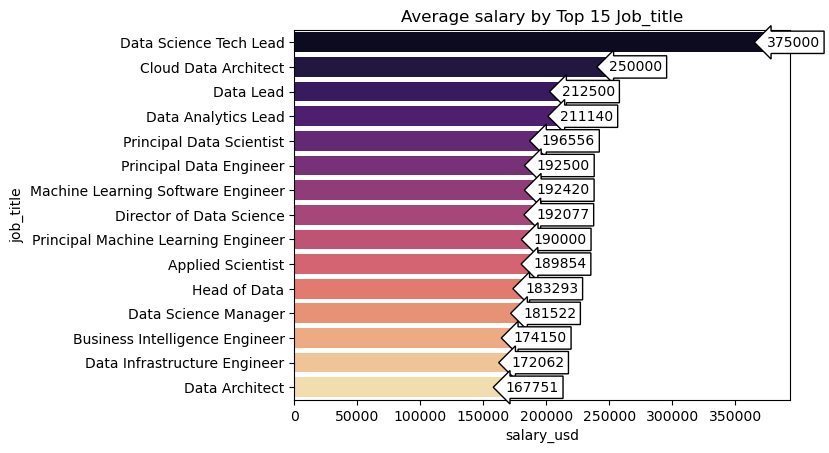

<Figure size 1200x800 with 0 Axes>

In [66]:
#salarywise Top 10 Job
#Average Salary by Location
job_salary=data.groupby('job_title')['salary_usd'].mean().reset_index()
job_salary=job_salary.sort_values(by='salary_usd',ascending=False)
top =15
p=sns.barplot(data=job_salary.head(top),x='salary_usd',y='job_title',palette='magma')
plt.title(f'Average salary by Top {top} Job_title',fontsize=12)
plt.ylabel('job_title',fontsize=10)
plt.xlabel('salary_usd',fontsize=10)
plt.figure(figsize=(12,8))
p.set_facecolor='#f4f4f4'
for container in p.containers:
    p.bar_label(container,
               fontsize=10,
               bbox={'boxstyle':'larrow','edgecolor':'black','facecolor':'white'},
               label_type='edge')
plt.show()

In [54]:
data['job_title'].unique()

array(['Applied Scientist', 'Data Quality Analyst',
       'Compliance Data Analyst', 'Machine Learning Engineer',
       'Research Scientist', 'Data Engineer', 'Data Analyst',
       'Data Scientist', 'BI Data Engineer', 'Research Engineer',
       'Business Data Analyst', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'AI Programmer',
       'AI Developer', 'Computer Vision Engineer', 'BI Developer',
       'Big Data Engineer', 'Deep Learning Engineer', 'Head of Data',
       'Analytics Engineer', 'Data Architect', 'Director of Data Science',
       'Head of Data Science', 'Data Analytics Manager', 'ML Engineer',
       'Applied Machine Learning Engineer', 'Applied Data Scientist',
       'ETL Engineer', 'Data Specialist', 'Lead Data Analyst',
       'Data Manager', 'Machine Learning Scientist', 'MLOps Engineer',
       'Financial Data Analyst', 'Software Data Engineer',
       'Data Science Manager', 'Data Science Consultant',
       'Machine Learning 

In [60]:
#create field column for job work field catecory
data['Field'] = 'Others'
wData =  data['job_title'].str.contains("Data")
wScience = data['job_title'].str.contains("Science")
wScientist = data['job_title'].str.contains("Scientist")
wMachine = data['job_title'].str.contains("Machine")
wLearning = data['job_title'].str.contains("Learning")
wEngineer = data['job_title'].str.contains("Engineer")
wEngineering = data['job_title'].str.contains("Engineering")
wAnalyst = data['job_title'].str.contains("Analyst")
data['Field'].loc[wData & (wScience | wScientist) & ~wMachine] = 'Data Science'
data['Field'].loc[wData & (wEngineer | wEngineering)] = 'Data Engineering'
data['Field'].loc[wMachine & wLearning & ~(wData & wScientist)] = 'Machine Learning'
data['Field'].loc[wData & wAnalyst & ~(wMachine | wScientist)] = 'Data Analysis'

In [61]:
data.head(20)

,work_year,experience_level,employment_type,job_title,salary_currency,company_location,company_size,salary_usd,Field
0,2023,Entry Level,Full Time,Applied Scientist,USD,US,Large,213660.0,Others
1,2023,Entry Level,Full Time,Applied Scientist,USD,US,Large,130760.0,Others
2,2023,Entry Level,Full Time,Data Quality Analyst,USD,NG,Large,100000.0,Data Analysis
3,2023,Entry Level,Full Time,Compliance Data Analyst,USD,NG,Large,30000.0,Data Analysis
4,2023,Entry Level,Full Time,Applied Scientist,USD,US,Large,204620.0,Others
5,2023,Entry Level,Full Time,Applied Scientist,USD,US,Large,110680.0,Others
6,2023,Entry Level,Full Time,Machine Learning Engineer,USD,US,Medium,163196.0,Machine Learning
7,2023,Entry Level,Full Time,Machine Learning Engineer,USD,US,Medium,145885.0,Machine Learning
8,2023,Entry Level,Full Time,Research Scientist,USD,US,Large,220000.0,Others
9,2023,Entry Level,Full Time,Data Engineer,USD,US,Medium,85000.0,Data Engineering


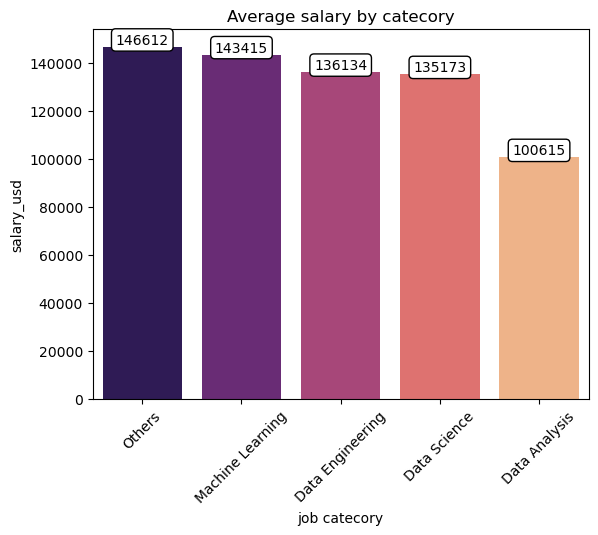

<Figure size 1200x800 with 0 Axes>

In [72]:
#Average Salary by field of work
fil_salary=data.groupby('Field')['salary_usd'].mean().reset_index()
fil_salary=fil_salary.sort_values(by='salary_usd',ascending=False)
p=sns.barplot(data=fil_salary,x='Field',y='salary_usd',palette='magma')
plt.title(f'Average salary by catecory',fontsize=12)
plt.ylabel('salary_usd',fontsize=10)
plt.xlabel('job catecory',fontsize=10)
plt.xticks(rotation='45')
plt.figure(figsize=(12,8))
p.set_facecolor='#f4f4f4'
for container in p.containers:
    p.bar_label(container,
               fontsize=10,
               bbox={'boxstyle':'round,pad=0.3','edgecolor':'black','facecolor':'white'},
               label_type='edge')
plt.show()

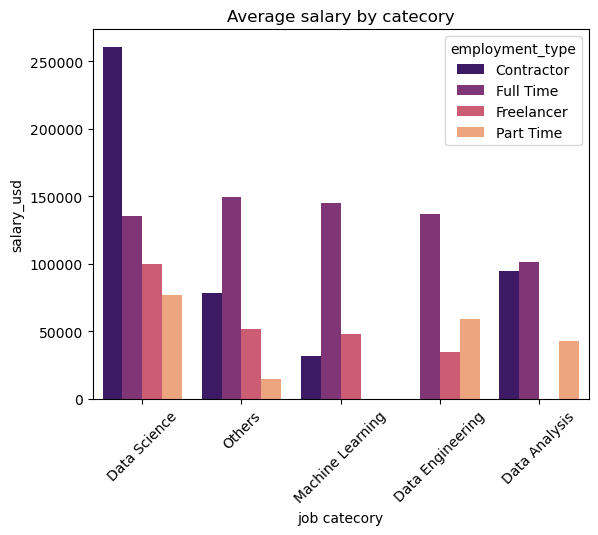

<Figure size 1200x800 with 0 Axes>

In [78]:
fil_salary=data.groupby(['Field','employment_type'])['salary_usd'].mean().reset_index()
fil_salary=fil_salary.sort_values(by='salary_usd',ascending=False)
p=sns.barplot(data=fil_salary,x='Field',y='salary_usd',hue='employment_type',palette='magma')
plt.title(f'Average salary by catecory',fontsize=12)
plt.ylabel('salary_usd',fontsize=10)
plt.xlabel('job catecory',fontsize=10)
plt.xticks(rotation='45')
plt.figure(figsize=(12,8))
p.set_facecolor='#f4f4f4'

plt.show()

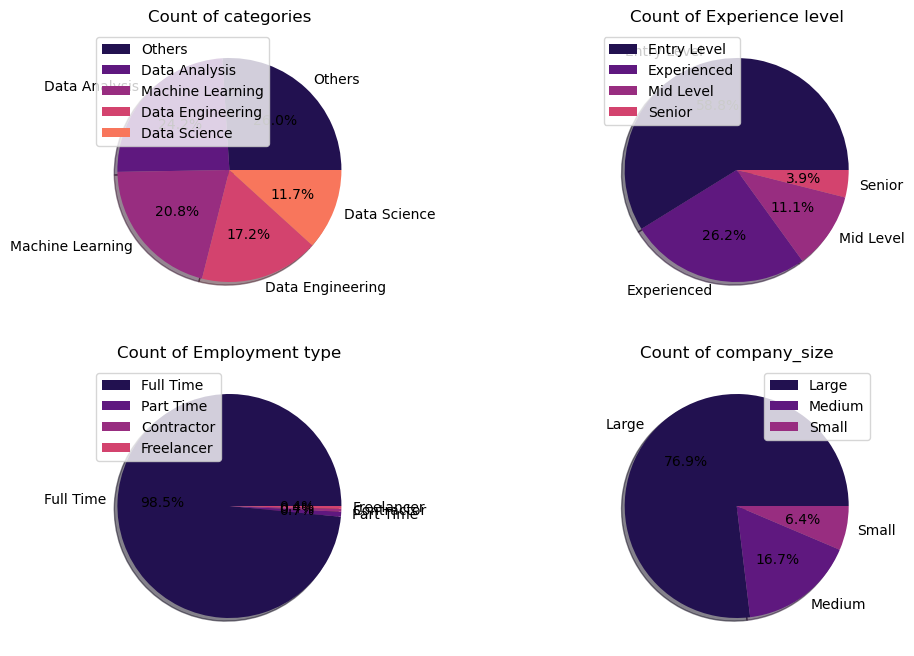

In [107]:
plt.figure(figsize=(12,8))
#for count of categories
plt.subplot(2,2,1)
data_1 = data['Field'].value_counts()
palette_color = sns.color_palette('magma')
plt.pie(data_1.values,labels=data['Field'].unique(),autopct='%2.1f%%',shadow=True,colors=palette_color)
plt.title('Count of categories')
plt.legend(loc='upper left')
#for count of Experience level
plt.subplot(2,2,2)
data_1 = data['experience_level'].value_counts()
palette_color = sns.color_palette('magma')
plt.pie(data_1.values,labels=data['experience_level'].unique(),autopct='%2.1f%%',shadow=True,colors=palette_color)
plt.title('Count of Experience level')
plt.legend(loc='upper left')
#for count of Employment type
plt.subplot(2,2,3)
data_1 = data['employment_type'].value_counts()
palette_color = sns.color_palette('magma')
plt.pie(data_1.values,labels=data['employment_type'].unique(),autopct='%2.1f%%',shadow=True,colors=palette_color)
plt.title('Count of Employment type')
plt.legend(loc='upper left')
#for count of company_size
plt.subplot(2,2,4)
data_1 = data['company_size'].value_counts()
palette_color = sns.color_palette('magma')
plt.pie(data_1.values,labels=data['company_size'].unique(),autopct='%2.1f%%',shadow=True,colors=palette_color)
plt.title('Count of company_size')
plt.legend(loc='best')

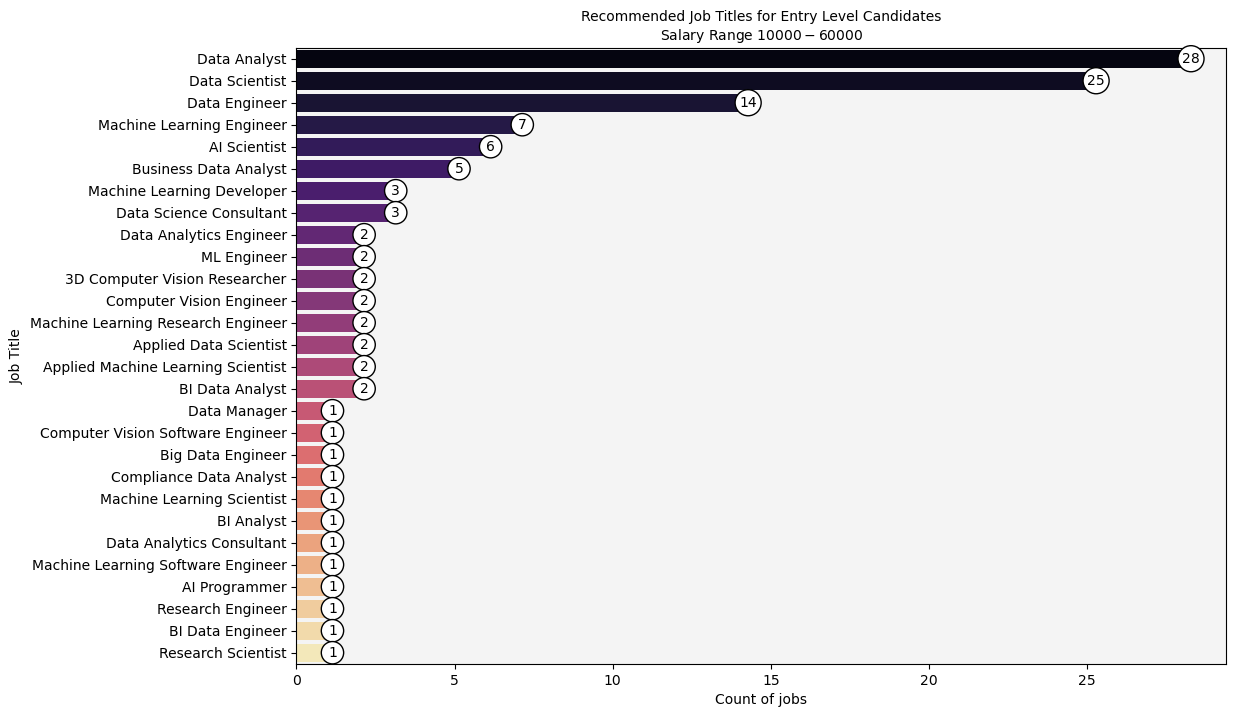

In [116]:
#job title Recommendation
desired_experience_level='Entry Level'
desired_salary_range=(10000,60000)
recommend_df=data[(data['experience_level']==desired_experience_level)&
                  (data['salary_usd']>=desired_salary_range[0])&
                  (data['salary_usd']<=desired_salary_range[1])]
#count the occurrences of each job title
job_counts=recommend_df['job_title'].value_counts().reset_index()
job_counts.columns=['job title','count']
plt.figure(figsize=(12,8))
p=sns.barplot(x='count',y='job title',data=job_counts,palette='magma')
plt.xlabel('Count of jobs')
plt.ylabel('Job Title')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]}-${desired_salary_range[1]}',fontsize=10)
for container in p.containers:
    p.bar_label(container,
               label_type='edge',
               color='black',
               bbox={'boxstyle':'circle,pad=0.3','facecolor':'white','edgecolor':'black'})
p.set_facecolor('#f4f4f4')
plt.show()

In [ ]:
#for entry level candidates seeking a job salary range between 10000-60000
#first recommended job is Data Analyst
#second recommended job is Data Scientist